In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [21]:
img = cv2.imread("C:\\Users\\barat\\Downloads\\image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

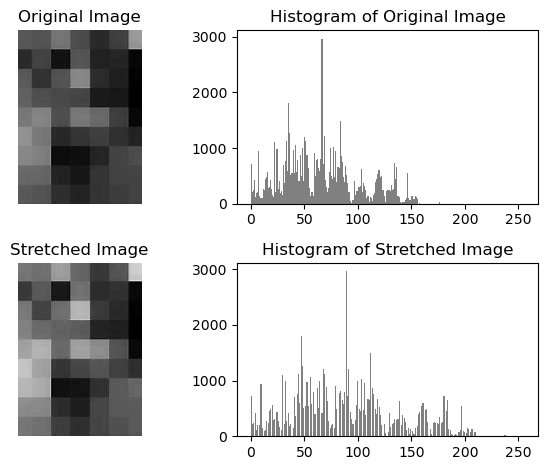

In [22]:
def stretch(image):
    # Split three channels (Red, Green, Blue)
    channels = cv2.split(image)
    
    st_channels = []
    
    for channel in channels:
        # Find the minimum and maximum pixel values 
        min_px = np.min(channel)
        max_px = np.max(channel)
        
        # Apply the contrast stretching formula
        st_channel = ((channel - min_px) / (max_px - min_px)) * 255
        
        # Clip the values to be in the range [0, 255] 
        st_channel = np.clip(st_channel, 0, 255).astype('uint8')
        
        st_channels.append(st_channel)
    
    # Merge the stretched channels back into an RGB image
    st_image = cv2.merge(st_channels)
    
    return st_image


# Apply manual histogram stretching for RGB image
st_image = stretch(img1)

# Plot the results for Histogram Stretching
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img1.flatten(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of Original Image')

# Stretched image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(st_image, cv2.COLOR_BGR2RGB))
plt.title('Stretched Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(st_image.flatten(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of Stretched Image')
plt.tight_layout()
plt.show()


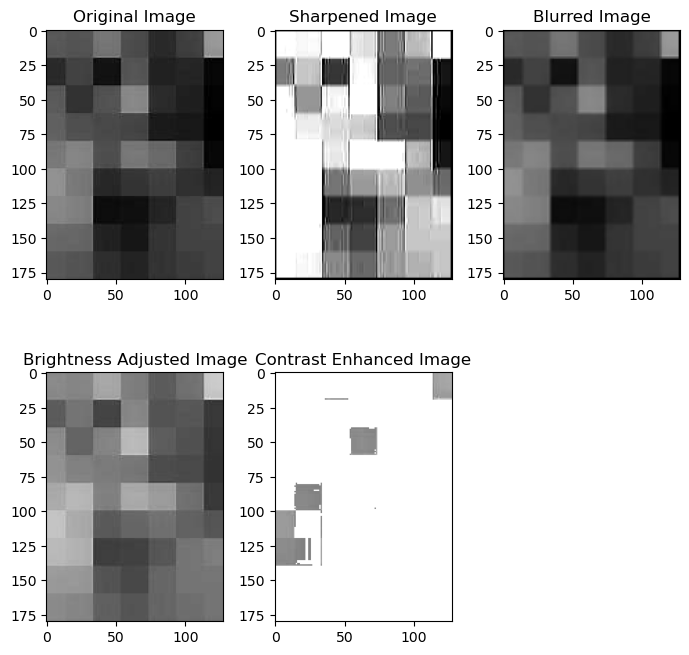

In [23]:
# 1. Image Sharpening 
def sharpen(img1):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    h, w = img1.shape[:2]
    sharp_img = np.zeros_like(img1)

    for i in range(1, h-1):
        for j in range(1, w-1):
            region = img1[i-1:i+2, j-1:j+2]
            sharp_img[i, j] = np.clip(np.sum(region * kernel), 0, 255)
    
    return sharp_img

# 2. Image Blurring (Mean Filter)
def blur(img, k=3):
    h, w = img1.shape[:2]
    blurred_img = np.zeros_like(img1)
    pad = k // 2

    for i in range(pad, h - pad):
        for j in range(pad, w - pad):
            region = img1[i - pad:i + pad + 1, j - pad:j + pad + 1]
            blurred_img[i, j] = np.mean(region, axis=(0, 1)).astype(np.uint8)
    
    return blurred_img

# 3. Brightness Adjustment
def adjust_brightness(img1, beta):
    return np.clip(img1 + beta, 0, 255).astype(np.uint8)

# 4. Contrast Enhancement
def enhance_contrast(img1, alpha):
    return np.clip(alpha * (img1 - 128) + 128, 0, 255).astype(np.uint8)

# Apply Enhancements
sharp_img = sharpen(img1)
blurred_img = blur(img1)
bright_img = adjust_brightness(img1, 50)
contrast_img = enhance_contrast(img1, 1.5)

# Plotting the results
plt.figure(figsize=(7, 7))

plt.subplot(2, 3, 1)
plt.imshow(img1)
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(sharp_img)
plt.title("Sharpened Image")

plt.subplot(2, 3, 3)
plt.imshow(blurred_img)
plt.title("Blurred Image")

plt.subplot(2, 3, 4)
plt.imshow(bright_img)
plt.title("Brightness Adjusted Image")

plt.subplot(2, 3, 5)
plt.imshow(contrast_img)
plt.title("Contrast Enhanced Image")

plt.tight_layout()
plt.show()


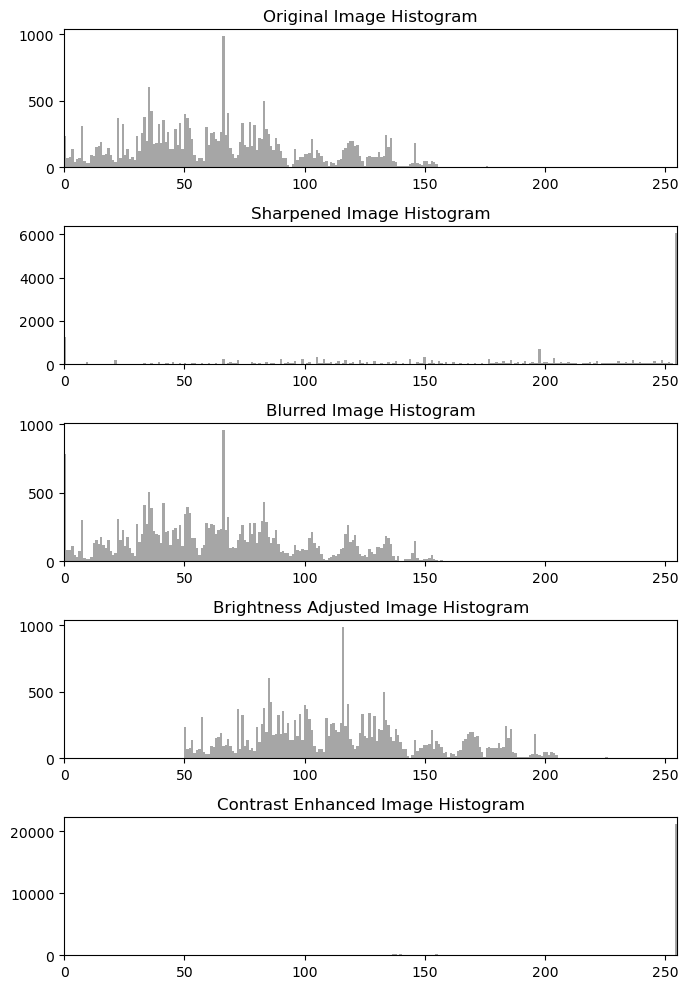

In [24]:
# Function to plot histogram
def plot_histogram(img, ax, title):
    ax.hist(img.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
    ax.set_title(title)
    ax.set_xlim([0, 255])

# Plotting the histograms
fig, axes = plt.subplots(5, 1, figsize=(7, 10))  

# Original Image Histogram
plot_histogram(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), axes[0], "Original Image Histogram")

# Sharpened Image Histogram
plot_histogram(cv2.cvtColor(sharp_img, cv2.COLOR_RGB2GRAY), axes[1], "Sharpened Image Histogram")

# Blurred Image Histogram
plot_histogram(cv2.cvtColor(blurred_img, cv2.COLOR_RGB2GRAY), axes[2], "Blurred Image Histogram")

# Brightness Adjusted Image Histogram
plot_histogram(cv2.cvtColor(bright_img, cv2.COLOR_RGB2GRAY), axes[3], "Brightness Adjusted Image Histogram")

# Contrast Enhanced Image Histogram
plot_histogram(cv2.cvtColor(contrast_img, cv2.COLOR_RGB2GRAY), axes[4], "Contrast Enhanced Image Histogram")
plt.tight_layout()
plt.show()


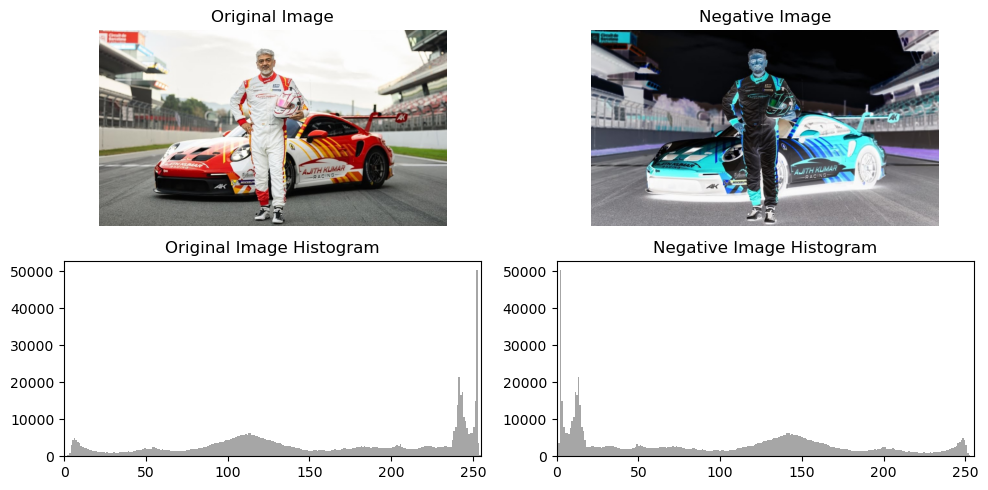

In [8]:
img = cv2.imread("C:\\Users\\barat\\Downloads\kadavuley.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Creating the negative image 
negative_img = 255 - img_rgb

fig, axes = plt.subplots(2, 2, figsize=(10,5))
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')  

# Negative Image and Histogram
axes[0, 1].imshow(negative_img)
axes[0, 1].set_title("Negative Image")
axes[0, 1].axis('off')  

# Original Image Histogram
plot_histogram(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), axes[1, 0], "Original Image Histogram")

# Negative Image Histogram
plot_histogram(cv2.cvtColor(negative_img, cv2.COLOR_RGB2GRAY), axes[1, 1], "Negative Image Histogram")
plt.tight_layout()
plt.show()


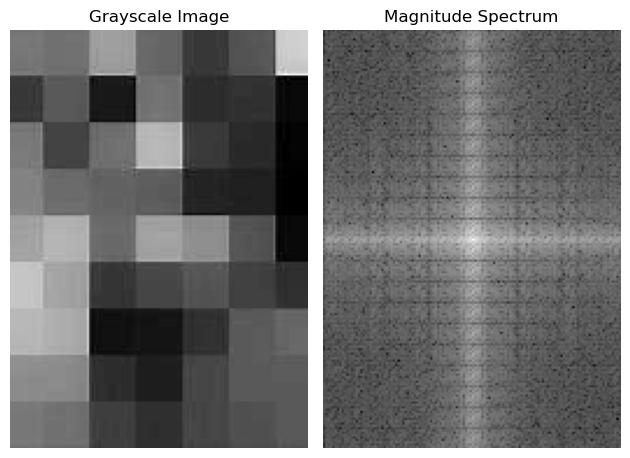

In [35]:
img1 = cv2.imread("C:\\Users\\barat\\Downloads\\image.jpg", cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off') 

plt.tight_layout()
plt.show()

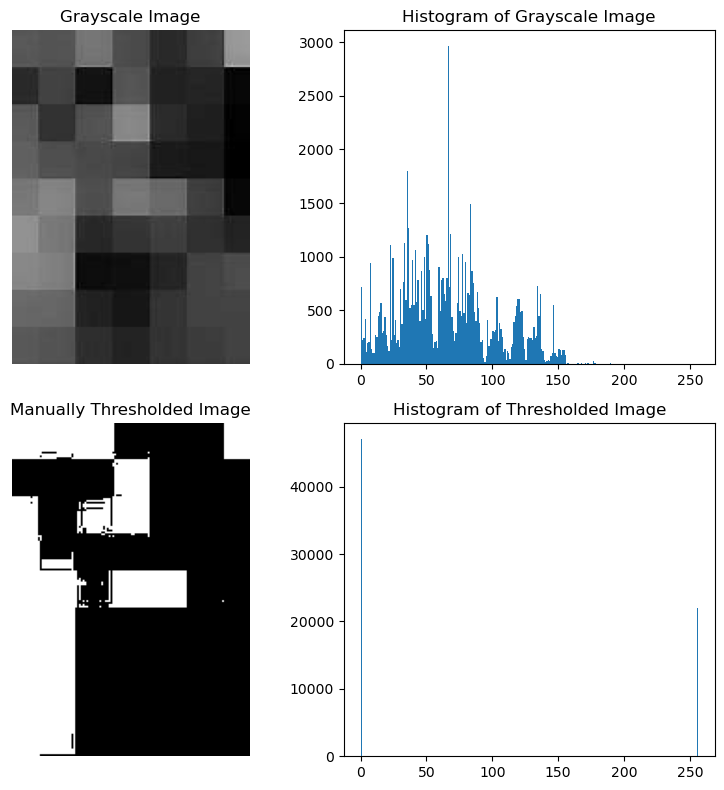

In [37]:
#Threshold limiting
thres_value = 80

binary_img = np.zeros_like(img)
binary_img[img > thres_value] = 255
# Plotting the results
plt.figure(figsize=(8, 8))

# Plot the original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Turn off axis

# Plot the histogram of the grayscale image
plt.subplot(2, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Grayscale Image')

# Plot the manually thresholded image
plt.subplot(2, 2, 3)
plt.imshow(binary_img, cmap='gray')
plt.title('Manually Thresholded Image')
plt.axis('off')  # Turn off axis

# Plot the histogram of the thresholded image
plt.subplot(2, 2, 4)
plt.hist(binary_img.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Thresholded Image')

plt.tight_layout()
plt.show()